In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

/Users/izo15/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  after removing the cwd from sys.path.


In [27]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [28]:
# Save references to each table
measurements = base.classes.measurement
stations = base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
recent_date = session.query(measurements.date).\
    order_by((measurements.date).desc()).limit(1).all()

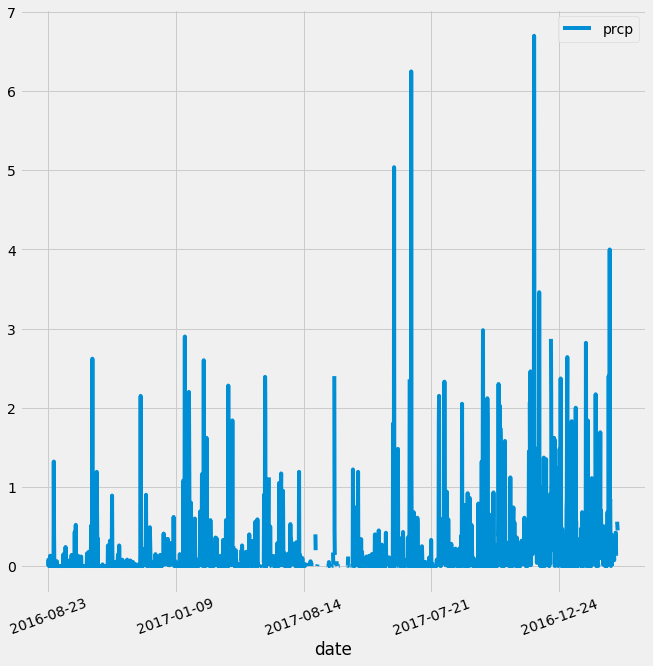

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

import datetime as dt
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
query_date

results = session.query(measurements.date, measurements.prcp).\
    filter(measurements.date >= query_date)

datelist = []

weather_data_df=pd.DataFrame(data=results, columns=['date', 'prcp'])
x = weather_data_df['date']
y = weather_data_df['prcp']
weather_data_df.plot(x='date', y='prcp', rot=20,figsize=(10,10))

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
weather_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(stations.station)).all()

[(9,)]

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
from sqlalchemy import text

stations_active = session.query(measurements.station, 
    func.count(measurements.station).label('station')
    ).group_by(measurements.station
    ).order_by(text('station desc')).all()

stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurements.station, 
       func.max(measurements.tobs), 
       func.min(measurements.tobs), 
       func.avg(measurements.tobs)]
active_station_stats = session.query(*sel).\
    filter((measurements.station) == "USC00519281").\
    group_by(measurements.tobs).\
    order_by(measurements.tobs).all()
active_station_stats

[('USC00519281', 54.0, 54.0, 54.0),
 ('USC00519281', 56.0, 56.0, 56.0),
 ('USC00519281', 57.0, 57.0, 57.0),
 ('USC00519281', 58.0, 58.0, 58.0),
 ('USC00519281', 59.0, 59.0, 59.0),
 ('USC00519281', 60.0, 60.0, 60.0),
 ('USC00519281', 61.0, 61.0, 61.0),
 ('USC00519281', 62.0, 62.0, 62.0),
 ('USC00519281', 63.0, 63.0, 63.0),
 ('USC00519281', 64.0, 64.0, 64.0),
 ('USC00519281', 65.0, 65.0, 65.0),
 ('USC00519281', 66.0, 66.0, 66.0),
 ('USC00519281', 67.0, 67.0, 67.0),
 ('USC00519281', 68.0, 68.0, 68.0),
 ('USC00519281', 69.0, 69.0, 69.0),
 ('USC00519281', 70.0, 70.0, 70.0),
 ('USC00519281', 71.0, 71.0, 71.0),
 ('USC00519281', 72.0, 72.0, 72.0),
 ('USC00519281', 73.0, 73.0, 73.0),
 ('USC00519281', 74.0, 74.0, 74.0),
 ('USC00519281', 75.0, 75.0, 75.0),
 ('USC00519281', 76.0, 76.0, 76.0),
 ('USC00519281', 77.0, 77.0, 77.0),
 ('USC00519281', 78.0, 78.0, 78.0),
 ('USC00519281', 79.0, 79.0, 79.0),
 ('USC00519281', 80.0, 80.0, 80.0),
 ('USC00519281', 81.0, 81.0, 81.0),
 ('USC00519281', 82.0, 82.0,

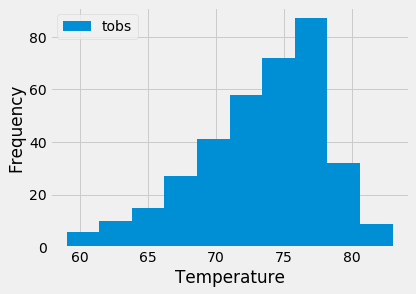

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
query_date = dt.date(2017,8,18) - dt.timedelta(days=365)
query_date

results = session.query(measurements.station, measurements.date, measurements.tobs).\
    filter(measurements.date >= query_date).\
    filter((measurements.station) == "USC00519281").all()

temp_data_df = pd.DataFrame(results, columns=['station', 'date', 'tobs'])
temp_data_df.plot.hist()
plt.tight_layout()
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Close Session

In [36]:
# Close Session
session.close()